# ***RANDOM_FOREST_CLASSIFICATION***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [ ]:
#encoding
from sklearn.preprocessing import LabelEncoder
lb_encoder=LabelEncoder()

In [ ]:
df['Gender'] =lb_encoder.fit_transform(df['Gender'])
df['Geography']=lb_encoder.fit_transform(df['Geography'])

In [ ]:
df['Geography'].unique()

array([0, 2, 1])

In [ ]:
df['Gender'].unique()

array([0, 1])

In [ ]:
#Independent and Dependent 
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [ ]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
#importing Rondom forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
#import mertics to get accuracy_score ,confusion metrix,classification report
from sklearn import metrics

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred))
print('Classification_report :\n',metrics.classification_report(y_test,y_pred))

Accuracy_Score : 0.8576666666666667
Confusion Matrix:
 [[2291   82]
 [ 345  282]]
Classification_report :
               precision    recall  f1-score   support

           0       0.87      0.97      0.91      2373
           1       0.77      0.45      0.57       627

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



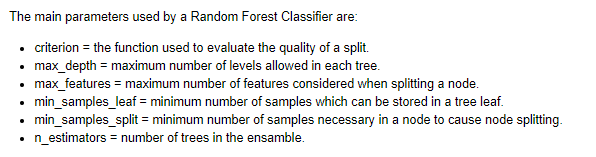

In [ ]:
#importong RandomisedSearch Cv ,GridSearch Cv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#creating a object or instance of Random forest Classifier
model=RandomForestClassifier()

In [ ]:
#Checking the all parametrs of RandomForestClassifier 
sorted(model.get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [ ]:
params ={
    'criterion':['gini','entropy'],
    'n_estimators':[int(x) for x in np.linspace(start=100 ,stop=1000,num=10)],
    'max_depth':[int(x) for x in np.linspace(10,1000,10)],
    'max_features':['auto','sqrt','log2'],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4,6,8]
}

In [ ]:
params

{'criterion': ['gini', 'entropy'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


RandomSearch Cv Hyper-tunning

In [ ]:
rf=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=5,scoring='accuracy',cv=5,verbose=2,n_jobs=-1,random_state=10)

In [ ]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf.best_params_

{'criterion': 'entropy',
 'max_depth': 670,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
best_random =rf.best_estimator_
best_random

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=670, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=230, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=230, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred))
print('Classification_report :\n',metrics.classification_report(y_test,y_pred))

Accuracy_Score : 0.8603333333333333
Confusion Matrix:
 [[2308   65]
 [ 354  273]]
Classification_report :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.81      0.44      0.57       627

    accuracy                           0.86      3000
   macro avg       0.84      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000



Grid cv

In [ ]:
param_grid = {
    'criterion': [rf.best_params_['criterion']],
    'max_depth': [rf.best_params_['max_depth']],
    'max_features': [rf.best_params_['max_features']],
    'min_samples_leaf': [rf.best_params_['min_samples_leaf'], 
                         rf.best_params_['min_samples_leaf']+2, 
                         rf.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf.best_params_['min_samples_split'] - 2,
                          rf.best_params_['min_samples_split'] - 1,
                          rf.best_params_['min_samples_split'], 
                          rf.best_params_['min_samples_split'] +1,
                          rf.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf.best_params_['n_estimators'] - 200, rf.best_params_['n_estimators'] - 100, 
                     rf.best_params_['n_estimators'], 
                     rf.best_params_['n_estimators'] + 100, rf.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [670], 'max_features': ['auto'], 'min_samples_leaf': [6, 8, 10], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [0, 100, 200, 300, 400]}


In [ ]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=2,verbose=1)

In [ ]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 75 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.5min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=230,
                                              max_features='log2',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 670,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 200}

In [ ]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=670, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
 model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=670, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=670, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred))
print('Classification_report :\n',metrics.classification_report(y_test,y_pred))

Accuracy_Score : 0.8616666666666667
Confusion Matrix:
 [[2314   59]
 [ 356  271]]
Classification_report :
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      2373
           1       0.82      0.43      0.57       627

    accuracy                           0.86      3000
   macro avg       0.84      0.70      0.74      3000
weighted avg       0.86      0.86      0.84      3000

